In [1]:
#подключаем библиотеки и загружаем данные.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv(r'sommelier_train.csv')
data.head(20)

,Country,Winery,Description,Designation,Province,Primary_region,Specific_region,Rate,Price,Variety
0,Portugal,Wines & Winemakers,"A classic Douro blend of Touriga Nacional, Tou...",Lua Cheia em Vinhas Velhas Colleja,Douro,NaN,NaN,87,12.0,Portuguese Red
1,US,Clos La Chance,"A little light in body and fruit, but achieves...",NaN,California,Santa Cruz Mountains,Central Coast,87,25.0,Pinot Noir
2,Spain,Pago de Carraovejas,"Big, bawdy, hard and concentrated, with black ...",Crianza,Northern Spain,Ribera del Duero,NaN,88,57.0,Tempranillo Blend
3,US,Six Sigma Ranch,Shows a polished structure that's dry and mode...,NaN,California,Lake County,Mendocino/Lake Counties,85,42.0,Cabernet Sauvignon
4,US,Coelho,"Fresh, clean flavors of plum and wild cherry a...",Estate Paciência,Oregon,Willamette Valley,Willamette Valley,89,45.0,Pinot Noir
5,US,Lancaster,"A challenging wine, made all the more so becau...",Estate,California,Alexander Valley,Sonoma,89,65.0,Cabernet Sauvignon
6,US,Steven Kent,Give this Cabernet some time in the cellar. Ri...,Ghielmetti Vineyard,California,Livermore Valley,Central Coast,93,60.0,Cabernet Sauvignon
7,France,Château Seguin,Earthy aromas are an off-putting start to this...,NaN,Bordeaux,Blaye Côtes de Bordeaux,NaN,83,15.0,Bordeaux-style Red Blend
8,US,Billsboro,"Notes of violet, preserved plums and cherries ...",NaN,New York,Finger Lakes,Finger Lakes,90,24.0,Pinot Noir
9,US,Peachy Canyon,"This wine strikes a perfect balance, showing t...",Westside,California,Paso Robles,Central Coast,89,19.0,Zinfandel


In [2]:
# Глянем сколько у нас пустых значений
data.isnull().sum()

Country                3
Winery                 0
Description            0
Designation        36063
Province               3
Primary_region     19368
Specific_region    70106
Rate                   0
Price              10717
Variety                0
dtype: int64

In [3]:
#сколько пропусков в каждом столбце % и всего
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Specific_region,70106,59.117280
Designation,36063,30.410328
Primary_region,19368,16.332175
Price,10717,9.037171
Province,3,0.002530
Country,3,0.002530
Variety,0,0.000000
Rate,0,0.000000
Description,0,0.000000
Winery,0,0.000000


In [4]:
#Specific_region, Designation, Primary_region - совсем плохо. Уберем их
data = data.drop(['Specific_region', 'Designation', 'Primary_region'], axis='columns')
data.head()

,Country,Winery,Description,Province,Rate,Price,Variety
0,Portugal,Wines & Winemakers,"A classic Douro blend of Touriga Nacional, Tou...",Douro,87,12.0,Portuguese Red
1,US,Clos La Chance,"A little light in body and fruit, but achieves...",California,87,25.0,Pinot Noir
2,Spain,Pago de Carraovejas,"Big, bawdy, hard and concentrated, with black ...",Northern Spain,88,57.0,Tempranillo Blend
3,US,Six Sigma Ranch,Shows a polished structure that's dry and mode...,California,85,42.0,Cabernet Sauvignon
4,US,Coelho,"Fresh, clean flavors of plum and wild cherry a...",Oregon,89,45.0,Pinot Noir


In [5]:
#zinfandel = primitivo. Есть синонимы одного и того же вида
s = list(data['Variety'].unique())
s.sort()
print(len(s))
s

191


['Agiorgitiko',
 'Aglianico',
 'Albariño',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Alvarinho',
 'Arinto',
 'Arneis',
 'Assyrtico',
 'Austrian Red Blend',
 'Austrian white blend',
 'Barbera',
 'Blaufränkisch',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Brachetto',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Merlot',
 'Cabernet Sauvignon',
 'Cabernet Sauvignon-Cabernet Franc',
 'Cabernet Sauvignon-Carmenère',
 'Cabernet Sauvignon-Malbec',
 'Cabernet Sauvignon-Merlot',
 'Cabernet Sauvignon-Shiraz',
 'Cabernet Sauvignon-Syrah',
 'Cannonau',
 'Carignan',
 'Carignane',
 'Carignano',
 'Carmenère',
 'Castelão',
 'Catarratto',
 'Champagne Blend',
 'Charbono',
 'Chardonnay',
 'Chardonnay-Viognier',
 'Chenin Blanc',
 'Chenin Blanc-Chardonnay',
 'Cinsault',
 'Claret',
 'Cortese',
 'Corvina, Rondinella, Molinara',
 'Dolcetto',
 'Falanghina',
 'Fernão Pires',
 'Fiano',
 'Frappato',
 'Friulano',
 'Fumé Blanc',
 'Furmint',
 'G-S-M',
 'Gamay',
 'Ga

In [6]:
# есть ли дубликаты
data.duplicated(['Description']).sum()

35296

In [7]:
#для чистоты показателей  - удалим им сразу
data = data.drop_duplicates(['Description'])

In [8]:
# есть ли дубликаты 
data.duplicated(['Description']).sum()

0

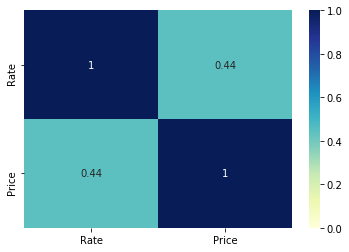

In [9]:
sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, cmap="YlGnBu")

count    83292.000000
mean        87.953273
std          3.221599
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: Rate, dtype: float64

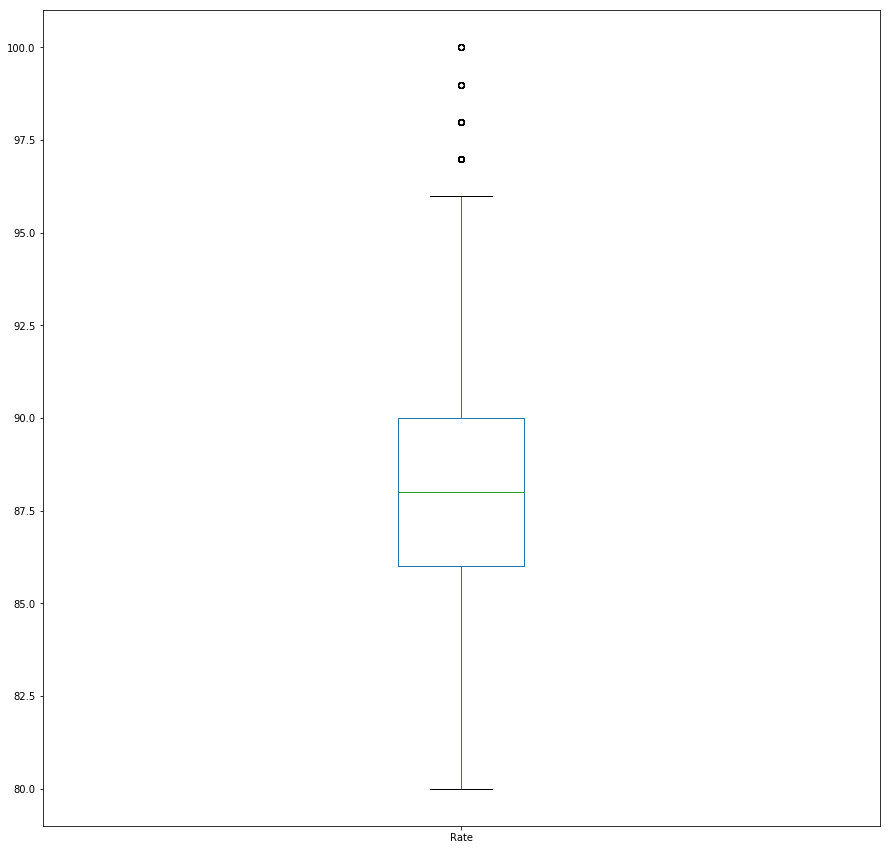

In [10]:
data['Rate'].plot.box(figsize = (15,15))
data['Rate'].describe()

count    75876.000000
mean        33.731233
std         38.162807
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: Price, dtype: float64

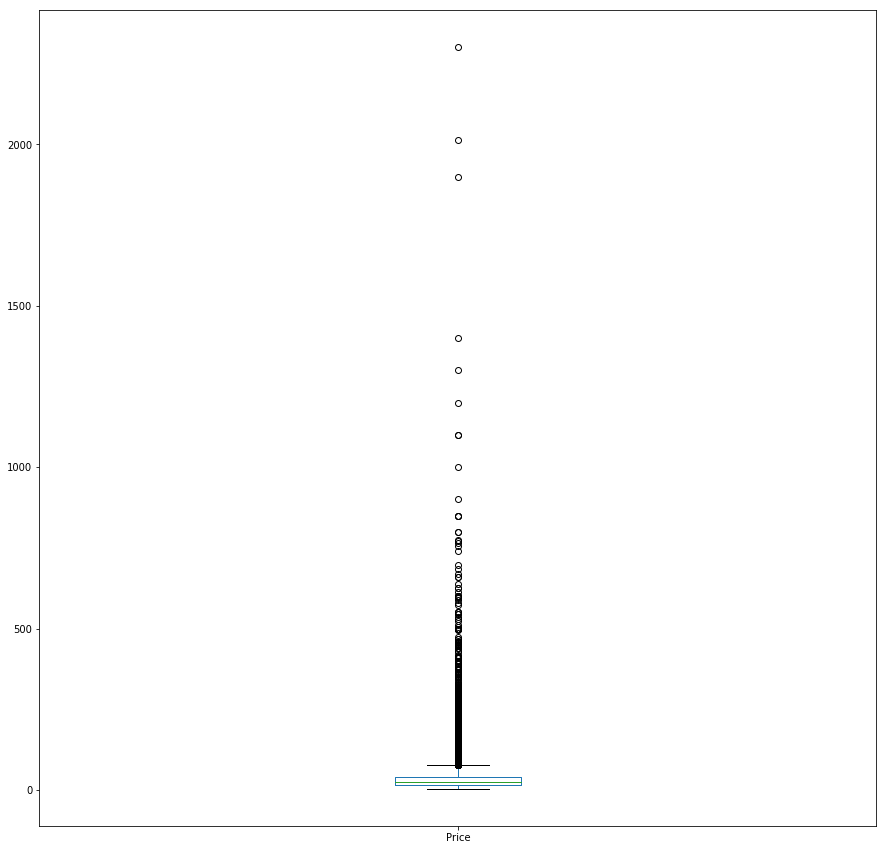

In [11]:
data['Price'].plot.box(figsize = (15,15))
data['Price'].describe()

In [12]:
data['Variety'].value_counts() / data['Variety'].count()

Pinot Noir                             0.096564
Chardonnay                             0.095675
Cabernet Sauvignon                     0.086515
Red Blend                              0.067990
Bordeaux-style Red Blend               0.052658
Sauvignon Blanc                        0.041937
Syrah                                  0.038443
Riesling                               0.037639
Merlot                                 0.033473
Zinfandel                              0.025200
Sangiovese                             0.022619
Malbec                                 0.020770
Rosé                                   0.019630
White Blend                            0.019282
Tempranillo                            0.016988
Portuguese Red                         0.014803
Nebbiolo                               0.013975
Sparkling Blend                        0.013495
Shiraz                                 0.013171
Corvina, Rondinella, Molinara          0.011646
Rhône-style Red Blend                  0

In [13]:
plt.figure(figsize=(15,15))
data.groupby(by='Country')['Price'].mean()


Country
Argentina         21.268986
Australia         31.444903
Austria           31.383592
Brazil            19.818182
Bulgaria          11.022222
Canada            36.348214
Chile             20.111216
China             17.000000
Croatia           20.444444
Cyprus            15.583333
Czech Republic    16.666667
Egypt                   NaN
England           48.571429
France            45.775947
Georgia           12.142857
Germany           41.491525
Greece            22.292627
Hungary           52.913462
India             13.000000
Israel            31.038462
Italy             37.912705
Lebanon           29.045455
Lithuania         10.000000
Luxembourg        40.666667
Macedonia         13.333333
Mexico            26.829787
Moldova           16.525000
Morocco           20.571429
New Zealand       24.338918
Portugal          27.517350
Romania           16.487805
Serbia            27.333333
Slovakia          15.500000
Slovenia          26.533333
South Africa      21.760711
Spain       

<Figure size 1080x1080 with 0 Axes>

In [14]:
plt.figure(figsize=(15,15))
data.groupby(by='Winery')['Price'].mean()

Winery
'37 Cellars                       NaN
1+1=3                       15.166667
10 Knots                    24.285714
1000 Stories                19.000000
1040FU                      25.000000
1070 Green                  25.000000
10Span                      15.000000
12 Linajes                  24.750000
12C Wines                   95.000000
14 Hands                    19.071429
16X20                       40.000000
1789 Wines                  48.000000
181                         15.000000
1848 Winery                 30.000000
1850                        28.000000
1919                        10.000000
2 Brothers                  10.500000
2 Cocky Sisters             10.500000
2 Copas                      8.000000
2 Up                        14.666667
21 Grams                   125.000000
25 Lagunas                  10.000000
2820 Wine Co.               20.000000
2Hawk                       24.000000
2nd Chance                  26.666667
3 Hills High                19.333333
3 Hor

<Figure size 1080x1080 with 0 Axes>

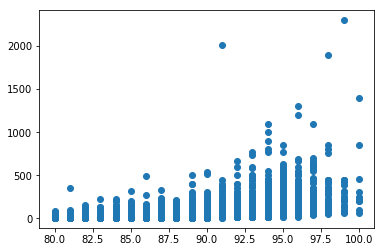

In [19]:
plt.scatter(data['Rate'], data['Price'])